In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

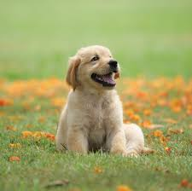

In [6]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [8]:
#|export
learn = load_learner('model.pkl')

In [10]:
%time learn.predict(im)

CPU times: user 15.8 s, sys: 166 ms, total: 16 s
Wall time: 2.76 s


('False', tensor(0), tensor([1.0000e+00, 5.8135e-07]))

In [11]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [12]:
classify_image(im)

{'Dog': 0.9999994039535522, 'Cat': 5.813523102915497e-07}

In [14]:
#|export
image = gr.Image(height=192, width=192) # lecture material deprecated
label = gr.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [16]:
# Lesson Code Decprecated

import nbdev
nbdev.export.nb_export('app.ipynb', './') # To save in same dir
print('Export successful')

Export successful
